In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from copy import deepcopy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

C:\Users\joell\AppData\Local\Temp\ipykernel_23724\2628748377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_filtered['date'] = pd.to_datetime(df_city_filtered['date'])
C:\Users\joell\AppData\Local\Temp\ipykernel_23724\2628748377.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_filtered['fully_vaccinated_rate'] = (df_city_filtered['fully_vaccinated'] / df_city_filtered['population']) * 100


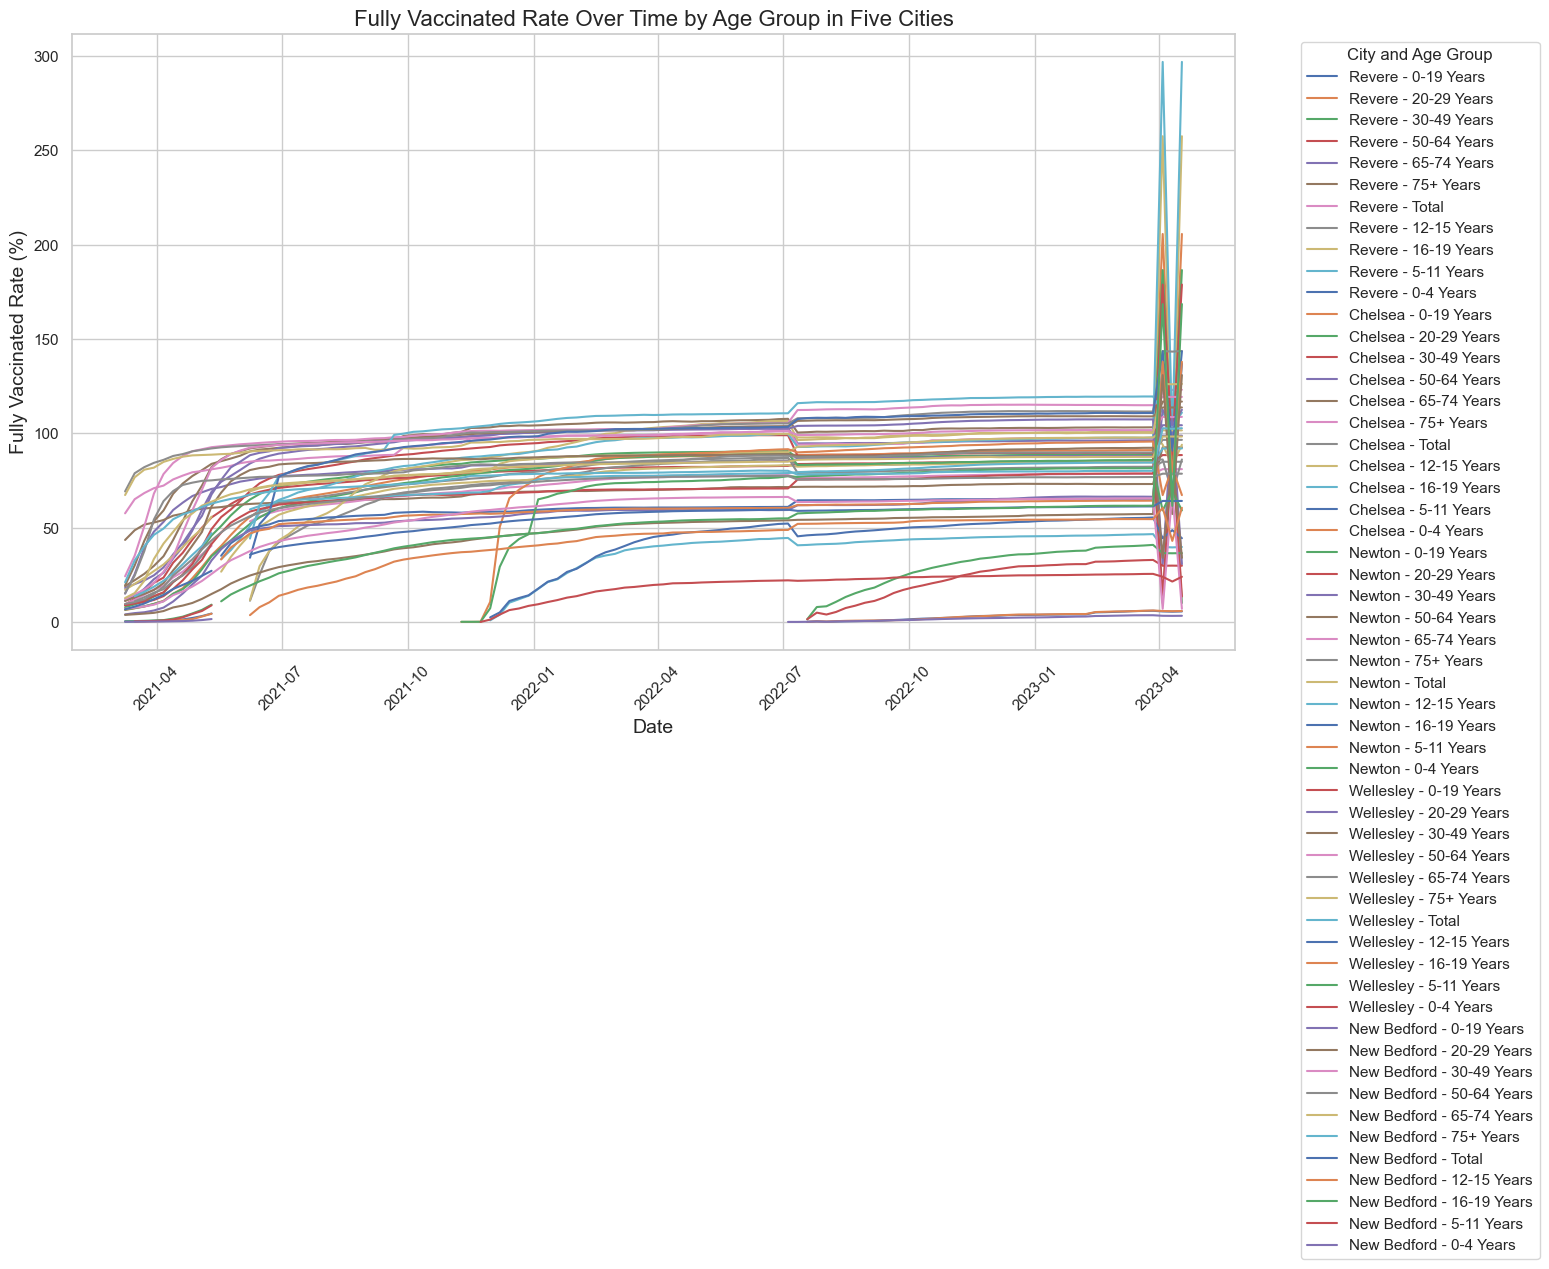

In [2]:
df_city_age = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')

cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']
df_city_filtered = df_city_age[df_city_age['city'].isin(cities_of_interest)]

df_city_filtered['date'] = pd.to_datetime(df_city_filtered['date'])

df_city_filtered['fully_vaccinated_rate'] = (df_city_filtered['fully_vaccinated'] / df_city_filtered['population']) * 100

columns_for_chart = ['date', 'city', 'age_group', 'fully_vaccinated_rate']

df_city_for_chart = df_city_filtered[columns_for_chart]

df_city_for_chart.head()

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))

for city in cities_of_interest:
    city_data = df_city_for_chart[df_city_for_chart['city'] == city]
    for age_group in city_data['age_group'].unique():
        age_group_data = city_data[city_data['age_group'] == age_group]
        plt.plot(age_group_data['date'], age_group_data['fully_vaccinated_rate'], label=f'{city} - {age_group}')

plt.title('Fully Vaccinated Rate Over Time by Age Group in Five Cities', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Fully Vaccinated Rate (%)', fontsize=14)
plt.legend(title='City and Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [3]:
age_groups_to_exclude_extended = ['Total', '0-19 Years']
df_city_for_chart_filtered_no_0_19 = df_city_for_chart[~df_city_for_chart['age_group'].isin(age_groups_to_exclude_extended)]
df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'] = df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'].clip(upper=100)

C:\Users\joell\AppData\Local\Temp\ipykernel_23724\3343317111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'] = df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'].clip(upper=100)


In [4]:
from scipy.stats import pearsonr

# Assigning a representative numerical value to each age group
age_group_mapping = {
    '0-4 Years': 2,    # Midpoint of 0-4
    '5-11 Years': 8,   # Midpoint of 5-11
    '12-15 Years': 13, # Midpoint of 12-15
    '16-19 Years': 17, # Midpoint of 16-19
    '20-29 Years': 25, # Midpoint of 20-29
    '30-49 Years': 40, # Midpoint of 30-49
    '50-64 Years': 57, # Midpoint of 50-64
    '65-74 Years': 70, # Midpoint of 65-74
    '75+ Years': 80    # Representative value for 75+
}


In [5]:
df = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')
# Filtering the dataset for a different specific date: November 2, 2021
df_nov_2021 = df[df['date'] == '2021-11-02']

# Mapping age groups to numerical values for the November 2021 data
df_nov_2021['age_numeric'] = df_nov_2021['age_group'].map(age_group_mapping)

# Calculating the fully vaccinated rate for November 2021
df_nov_2021['fully_vaccinated_rate'] = (df_nov_2021['fully_vaccinated'] / df_nov_2021['population']) * 100

# Generate 1000 random samples and calculate averages
sample_averages = []
for _ in range(10):
    sample = df_nov_2021.sample(n=10)
    sample_avg = sample['fully_vaccinated_rate'].mean()
    sample_averages.append(sample_avg)

# Convert to DataFrame for analysis
sample_averages_df = pd.DataFrame(sample_averages, columns=['Average_Fully_Vaccinated_Rate'])

sample_averages_df

C:\Users\joell\AppData\Local\Temp\ipykernel_23724\945590478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov_2021['age_numeric'] = df_nov_2021['age_group'].map(age_group_mapping)
C:\Users\joell\AppData\Local\Temp\ipykernel_23724\945590478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov_2021['fully_vaccinated_rate'] = (df_nov_2021['fully_vaccinated'] / df_nov_2021['population']) * 100


,Average_Fully_Vaccinated_Rate
0,70.084588
1,80.842542
2,65.908068
3,77.317770
4,67.811198
5,71.946582
6,73.513829
7,69.762956
8,81.611754
9,66.264798


In [6]:
df = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')
# Filtering the dataset for a different specific date: November 2, 2021
df_nov_2021 = df[df['date'] == '2021-11-02']

# Mapping age groups to numerical values for the November 2021 data
df_nov_2021['age_numeric'] = df_nov_2021['age_group'].map(age_group_mapping)

# Calculating the fully vaccinated rate for November 2021
df_nov_2021['fully_vaccinated_rate'] = (df_nov_2021['fully_vaccinated'] / df_nov_2021['population']) * 100


# Grouping by age group and calculating the mean vaccination rate for November 2021
grouped_data_nov_2021 = df_nov_2021.groupby('age_group')['fully_vaccinated_rate'].mean().reset_index()
grouped_data_nov_2021['age_numeric'] = grouped_data_nov_2021['age_group'].map(age_group_mapping)

# Checking the availability and completeness of data for November 2021
grouped_data_nov_2021


C:\Users\joell\AppData\Local\Temp\ipykernel_23724\45109859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov_2021['age_numeric'] = df_nov_2021['age_group'].map(age_group_mapping)
C:\Users\joell\AppData\Local\Temp\ipykernel_23724\45109859.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov_2021['fully_vaccinated_rate'] = (df_nov_2021['fully_vaccinated'] / df_nov_2021['population']) * 100


,age_group,fully_vaccinated_rate,age_numeric
0,12-15 Years,66.678846,13.0
1,16-19 Years,75.040658,17.0
2,20-29 Years,67.215325,25.0
3,30-49 Years,74.576553,40.0
4,50-64 Years,81.056944,57.0
5,65-74 Years,89.421886,70.0
6,75+ Years,88.290665,80.0
7,Total,69.741769,NaN


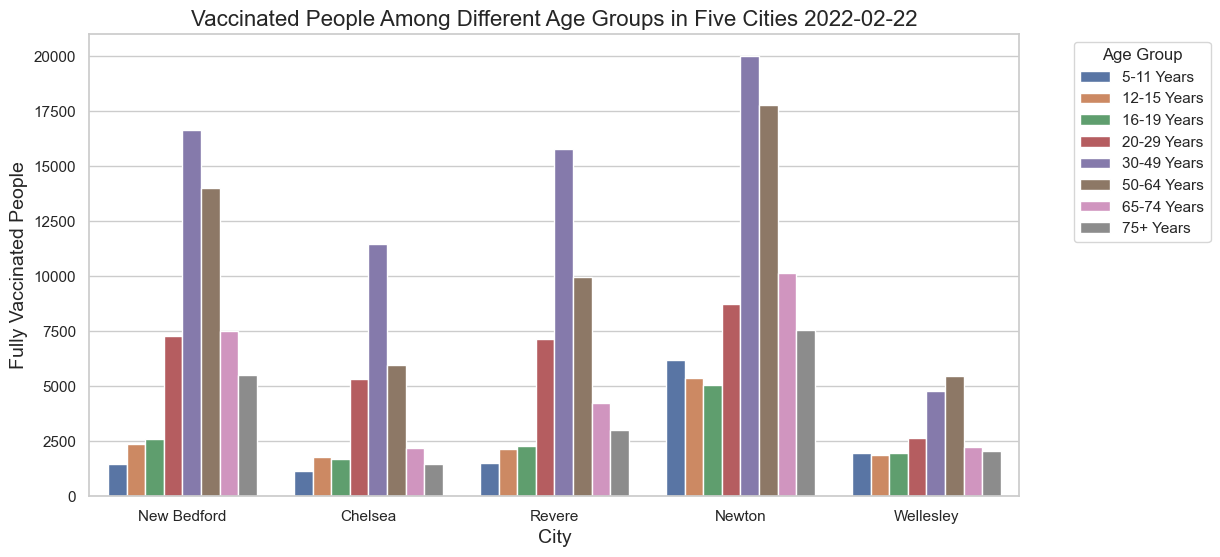

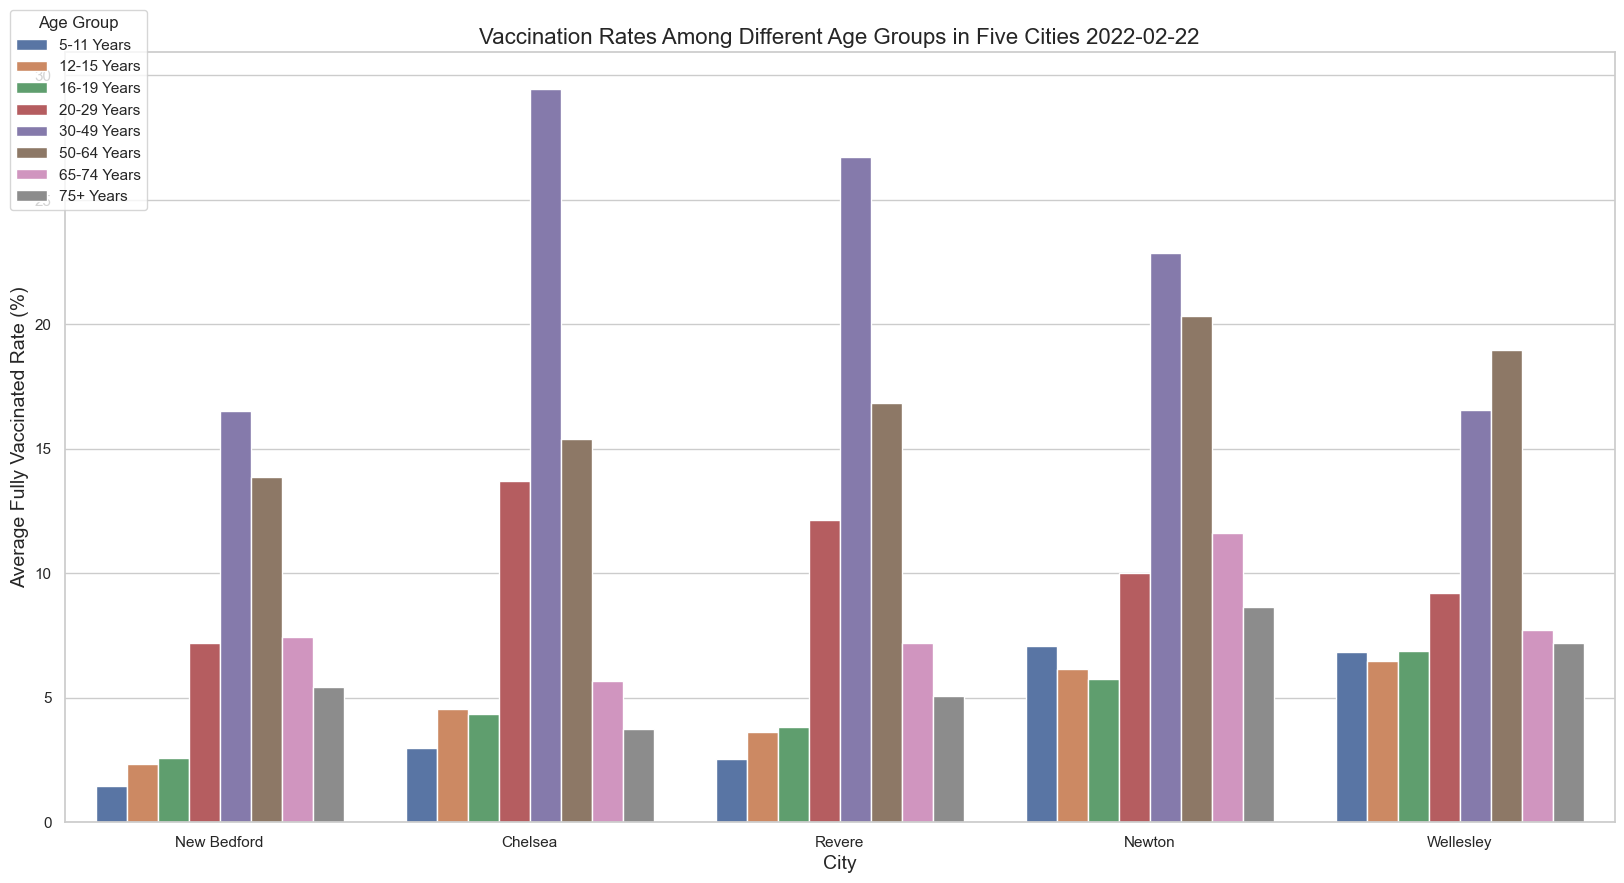

In [7]:
df = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')

# Population updates
population_updates = {
    'Revere': 59075,
    'Chelsea': 38889,
    'Newton': 87453,
    'Wellesley': 28747,
    'New Bedford': 100941
}

for city, new_population in population_updates.items():
    df.loc[df['city'] == city, 'population'] = new_population


# Filter the dataset for the specified cities
cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']
filtered_data = df[df['city'].isin(cities_of_interest)]

# Dropping the 'county', 'boosted_after_2022-09-01', 'boosted', 'boosted_second', 'partially_vaccinated'
columns_to_drop = ['county', 'boosted_after_2022-09-01', 'boosted', 'boosted_second', 'partially_vaccinated']
filtered_data_cleaned = filtered_data.drop(columns=columns_to_drop)

filtered_data_cleaned = filtered_data_cleaned[filtered_data_cleaned['date'] == '2022-02-22']

filtered_data_cleaned

plt.figure(figsize=(12, 6))
order = ['New Bedford','Chelsea','Revere','Newton', 'Wellesley']
hue_order = ['5-11 Years','12-15 Years', '16-19 Years', '20-29 Years', '30-49 Years', '50-64 Years', '65-74 Years','75+ Years']
sns.barplot(data=filtered_data_cleaned, x='city', y='fully_vaccinated', hue='age_group', hue_order=hue_order, order = order)

# Improving plot aesthetics
plt.xlabel('City', fontsize=14)
plt.ylabel('Fully Vaccinated People', fontsize=14)
plt.title('Vaccinated People Among Different Age Groups in Five Cities 2022-02-22', fontsize=16)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.set_style("whitegrid")

# Show the plot
plt.show()


filtered_data_cleaned['fully_vaccinated_rate'] = (filtered_data_cleaned['fully_vaccinated'] / filtered_data_cleaned['population']) * 100
plt.figure(figsize=(20, 10))
sns.barplot(data=filtered_data_cleaned, x='city', y='fully_vaccinated_rate', hue='age_group',hue_order= hue_order, order = order)


# Improving plot aesthetics
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Fully Vaccinated Rate (%)', fontsize=14)
plt.title('Vaccination Rates Among Different Age Groups in Five Cities 2022-02-22', fontsize=16)
plt.legend(title='Age Group', loc='upper right', bbox_to_anchor=(0.17, 0.93), bbox_transform=plt.gcf().transFigure)
sns.set_style("whitegrid")

# Show the plot
plt.show()

C:\Users\joell\AppData\Local\Temp\ipykernel_23724\2373094989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_filtered['date'] = pd.to_datetime(df_city_filtered['date'])
C:\Users\joell\AppData\Local\Temp\ipykernel_23724\2373094989.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'] = df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'].clip(upper=100)


<Figure size 1500x800 with 0 Axes>

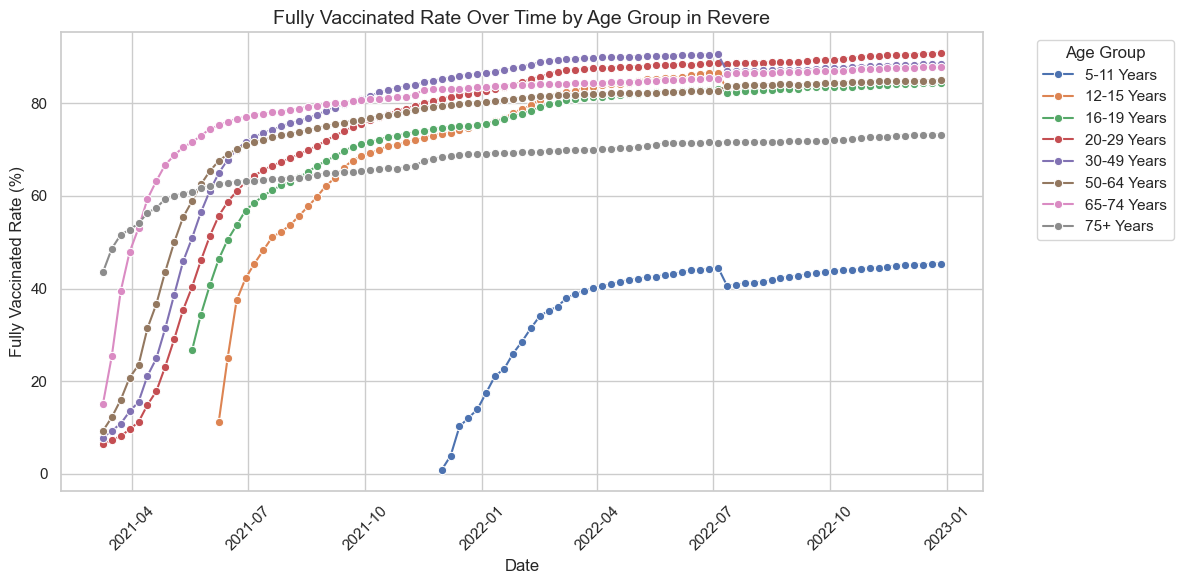

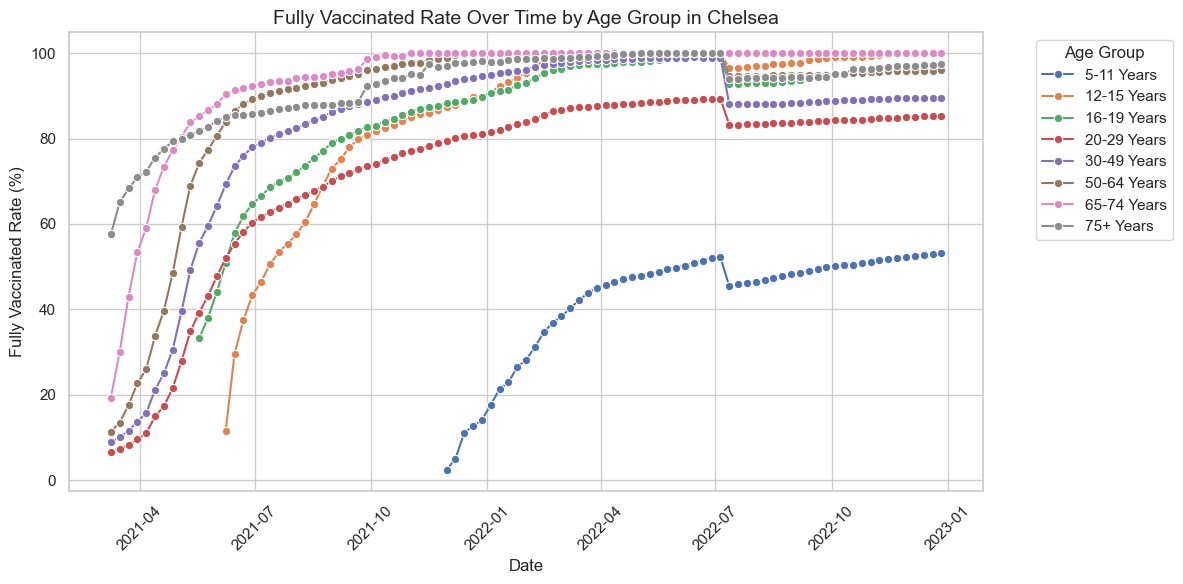

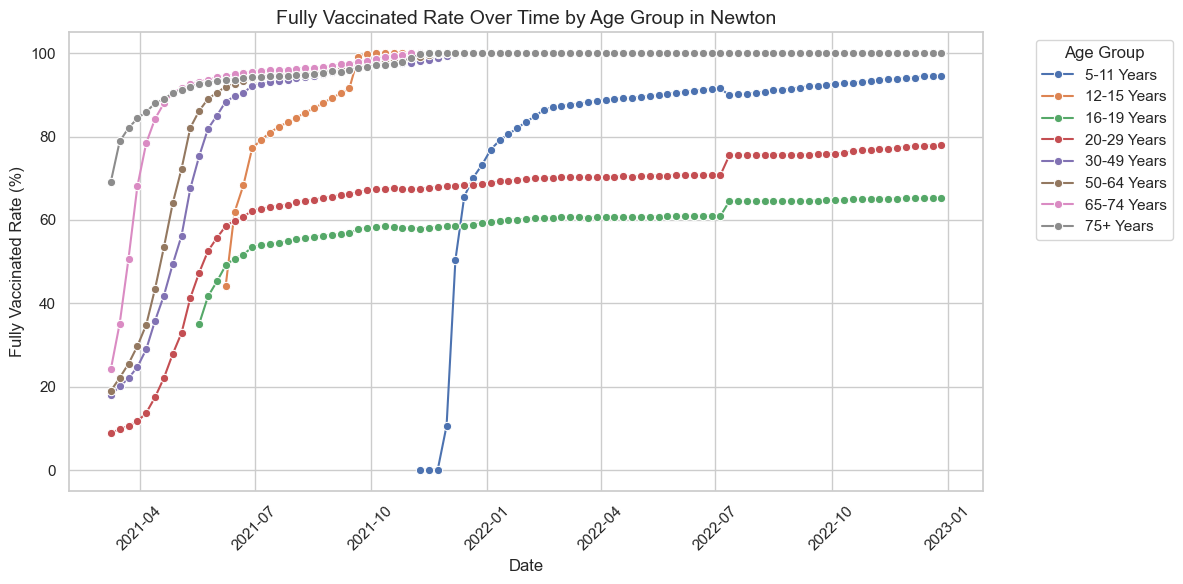

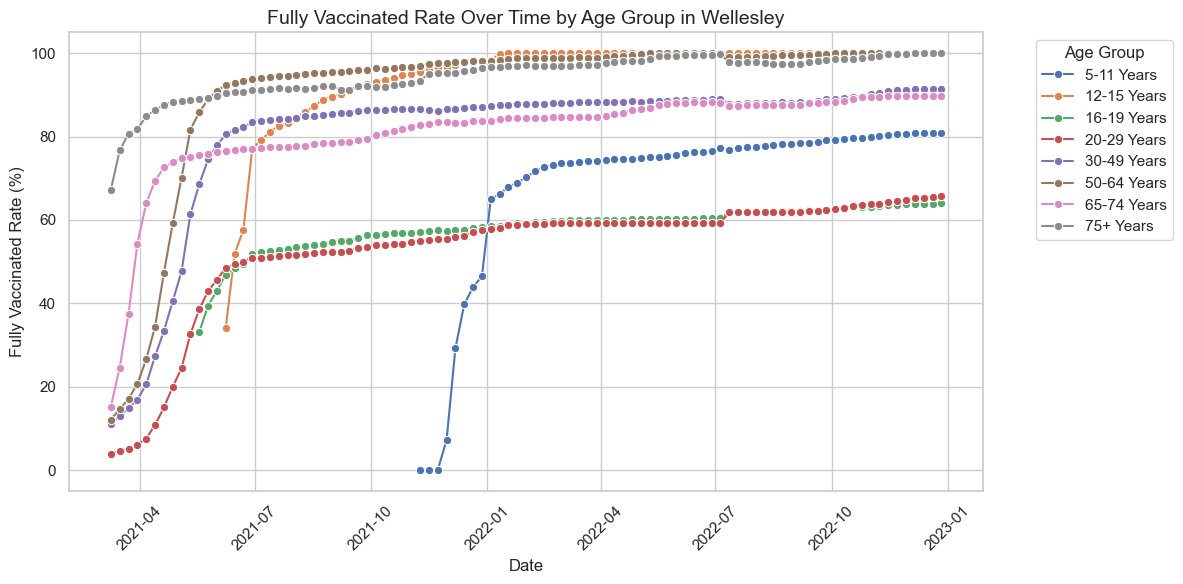

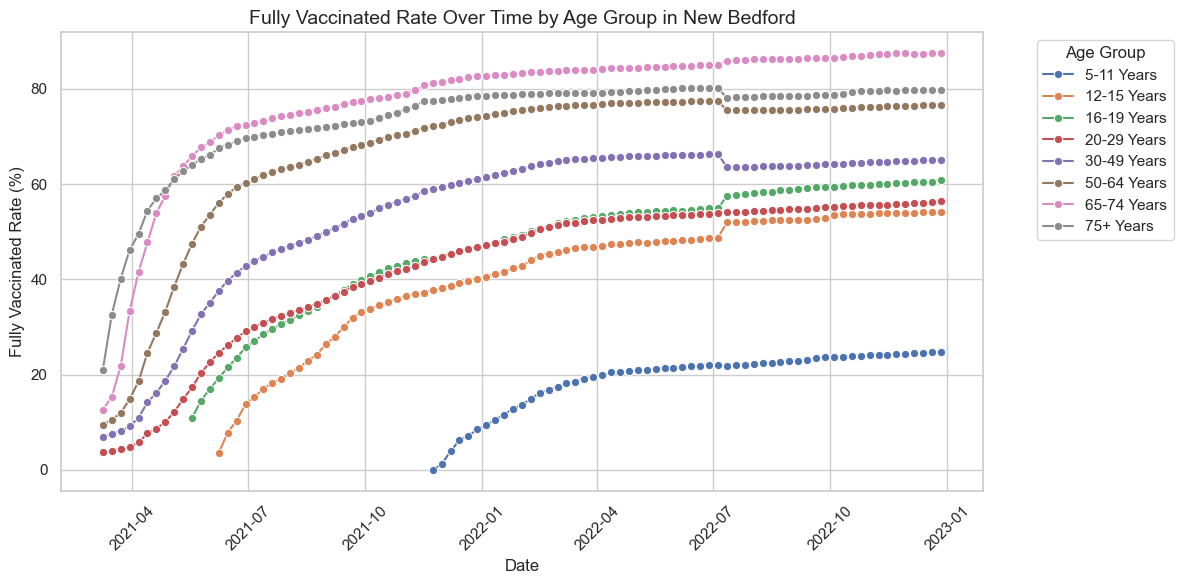

C:\Users\joell\AppData\Local\Temp\ipykernel_23724\2373094989.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_city_for_chart_filtered_no_0_19, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order=hue_order, ci = None)


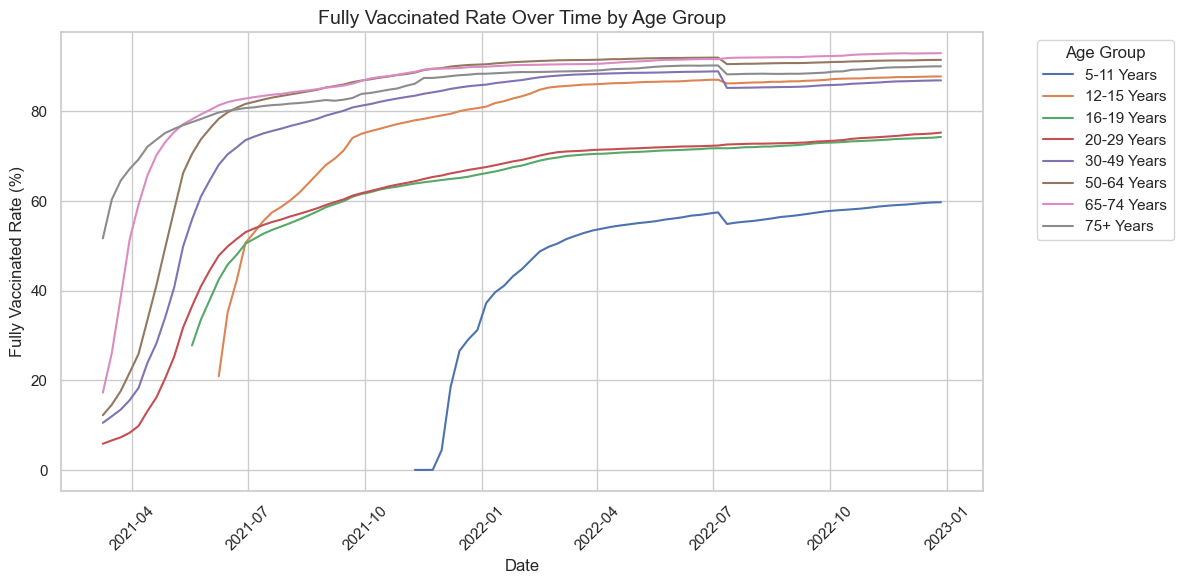

In [9]:
df_city_age = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')

cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']
df_city_filtered = df_city_age[df_city_age['city'].isin(cities_of_interest)]

# Parsing dates
df_city_filtered['date'] = pd.to_datetime(df_city_filtered['date'])

df_city_filtered = df_city_filtered[df_city_filtered['date'] < pd.to_datetime('2023-01-01')]

df_city_filtered['fully_vaccinated_rate'] = (df_city_filtered['fully_vaccinated'] / df_city_filtered['population']) * 100

columns_for_chart = ['date', 'city', 'age_group', 'fully_vaccinated_rate']

df_city_for_chart = df_city_filtered[columns_for_chart]

df_city_for_chart.head()

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))

age_groups_to_exclude_extended = ['Total', '0-19 Years']
df_city_for_chart_filtered_no_0_19 = df_city_for_chart[~df_city_for_chart['age_group'].isin(age_groups_to_exclude_extended)]
df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'] = df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'].clip(upper=100)

for city in cities_of_interest:
    plt.figure(figsize=(12, 6))
    city_data = df_city_for_chart_filtered_no_0_19[df_city_for_chart_filtered_no_0_19['city'] == city]

    sns.lineplot(data=city_data, x='date', y='fully_vaccinated_rate', hue='age_group', marker='o', hue_order=hue_order)

    plt.title(f'Fully Vaccinated Rate Over Time by Age Group in {city}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Fully Vaccinated Rate (%)', fontsize=12)
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_city_for_chart_filtered_no_0_19, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order=hue_order, ci = None)

plt.title(f'Fully Vaccinated Rate Over Time by Age Group', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fully Vaccinated Rate (%)', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\joell\AppData\Local\Temp\ipykernel_23724\3857779888.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_city_for_chart_filtered_no_0_19, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order = hue_order, ci=None, marker='o', linewidth=1.5)


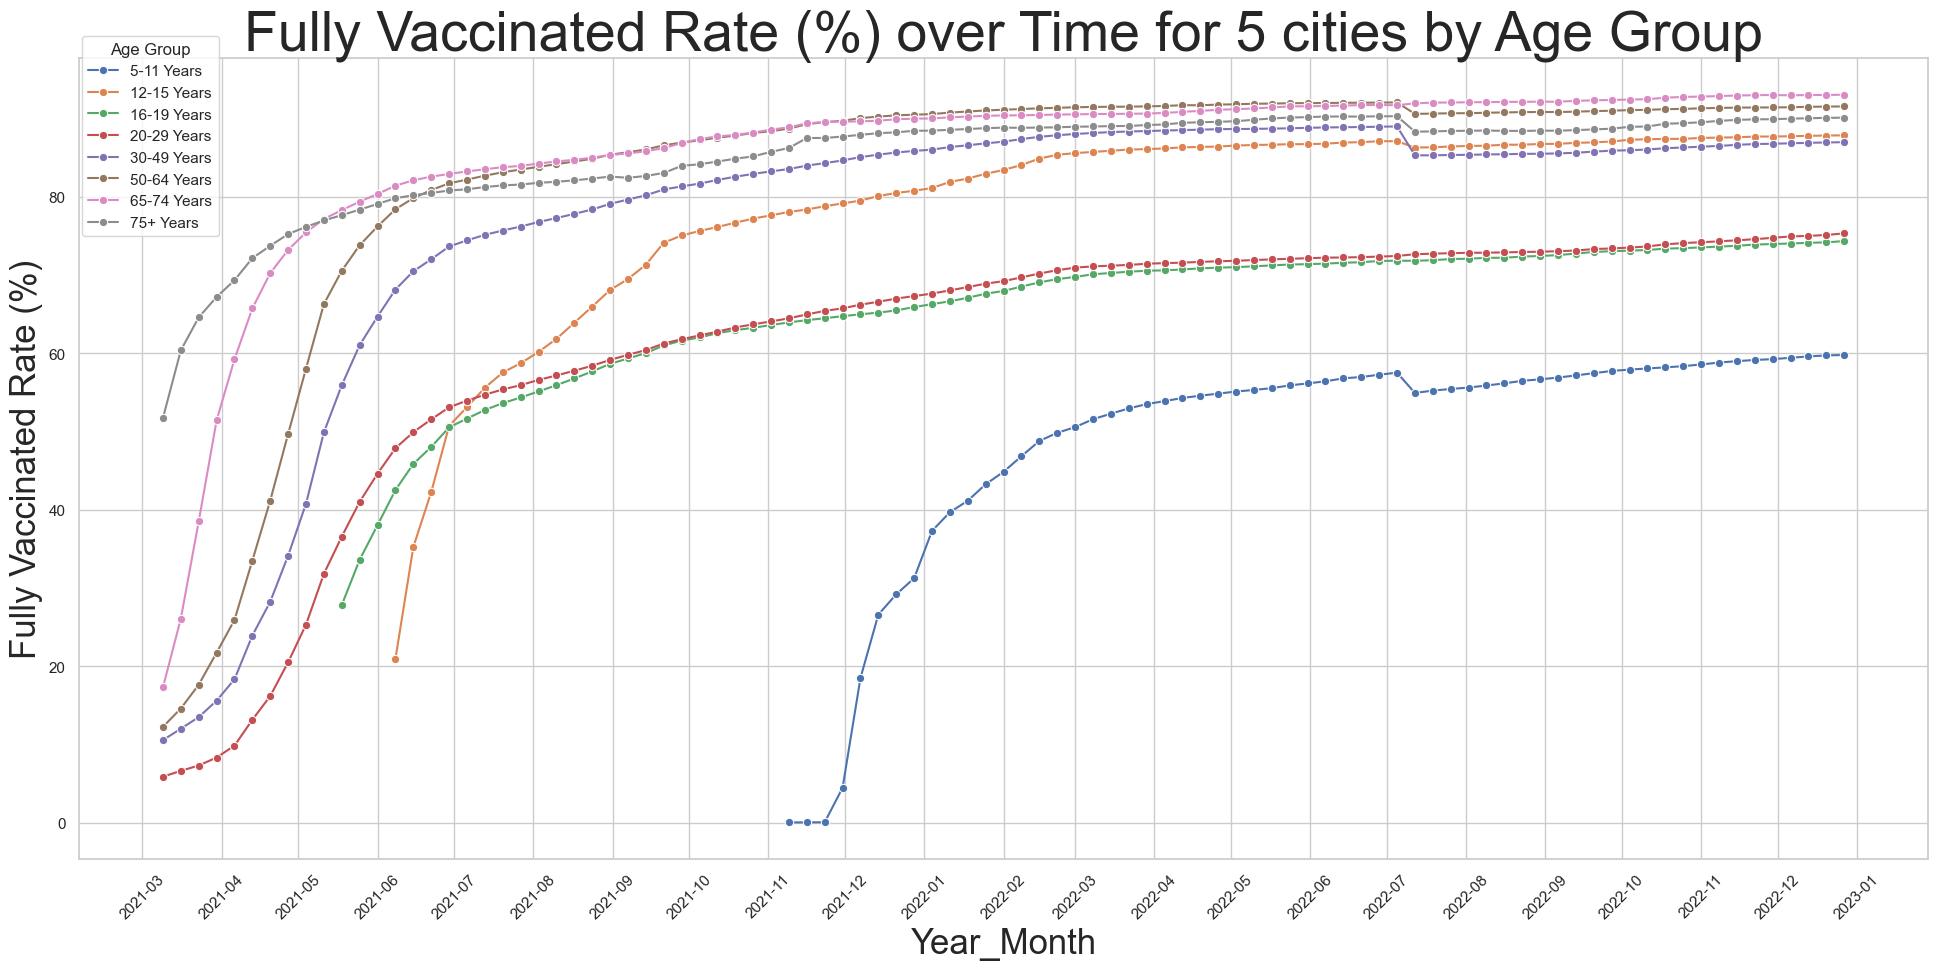

In [10]:
import matplotlib.dates as mdates
plt.figure(figsize=(20, 10))
# Adding markers with 'o' and reducing line width for better visibility
sns.lineplot(data=df_city_for_chart_filtered_no_0_19, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order = hue_order, ci=None, marker='o', linewidth=1.5)

# Adding plot title and labels
plt.title('Fully Vaccinated Rate (%) over Time for 5 cities by Age Group', fontsize=40)
plt.xlabel('Year_Month', fontsize=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.ylabel('Fully Vaccinated Rate (%)', fontsize=25)

# Moving the legend inside the plot. Adjust these parameters as needed for your layout
plt.legend(title='Age Group', loc='upper right', bbox_to_anchor=(0.14, 0.95), bbox_transform=plt.gcf().transFigure)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
import statsmodels.formula.api as smf
# Constructing the linear regression model
formula = 'fully_vaccinated_rate ~ age_group + city'
model = smf.ols(formula, data=df_city_for_chart_filtered_no_0_19).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     fully_vaccinated_rate   R-squared:                       0.552
Model:                               OLS   Adj. R-squared:                  0.550
Method:                    Least Squares   F-statistic:                     370.4
Date:                   Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                           11:38:36   Log-Likelihood:                -15520.
No. Observations:                   3624   AIC:                         3.107e+04
Df Residuals:                       3611   BIC:                         3.115e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [13]:
import pandas as pd

df = pd.read_csv('/BU_grad/DS701_Tools/final_data.csv')


X = df.drop(['fully_vac_rate', 'year_month', 'city', 'Year','Month','Labor Force',
             'Employed','city_rate','Massachusetts Rate','boosted_rate_Multi',
             'boosted_rate_NH/PI','boosted_rate_Other/Unknown','fully_vac_rate_Multi',
             'fully_vac_rate_NH/PI','fully_vac_rate_Other/Unknown','onedose_vac_rate_Multi',
             'onedose_vac_rate_Other/Unknown','onedose_vac_rate_Total_y','boosted_rate_Total',
             'onedose_vac_rate_Total_x','onedose_vac_rate_Total'], axis=1)  # Features
y = df['fully_vac_rate']  # Target
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Setting a threshold for missing values at 20%
missing_value_threshold_20 = 20.0  # 20%

# Identifying columns with missing values greater than the 20% threshold
columns_to_remove = df.isnull().mean() * 100 > missing_value_threshold_20
columns_to_remove = columns_to_remove[columns_to_remove].index.tolist()

# Removing these columns from the dataset
df_reduced = df.drop(columns=columns_to_remove)
df_reduced_dropped = df_reduced.drop(['year_month', 'city','Year','Month','Labor Force'], axis=1)


X shape: (130, 54), y shape: (130,)


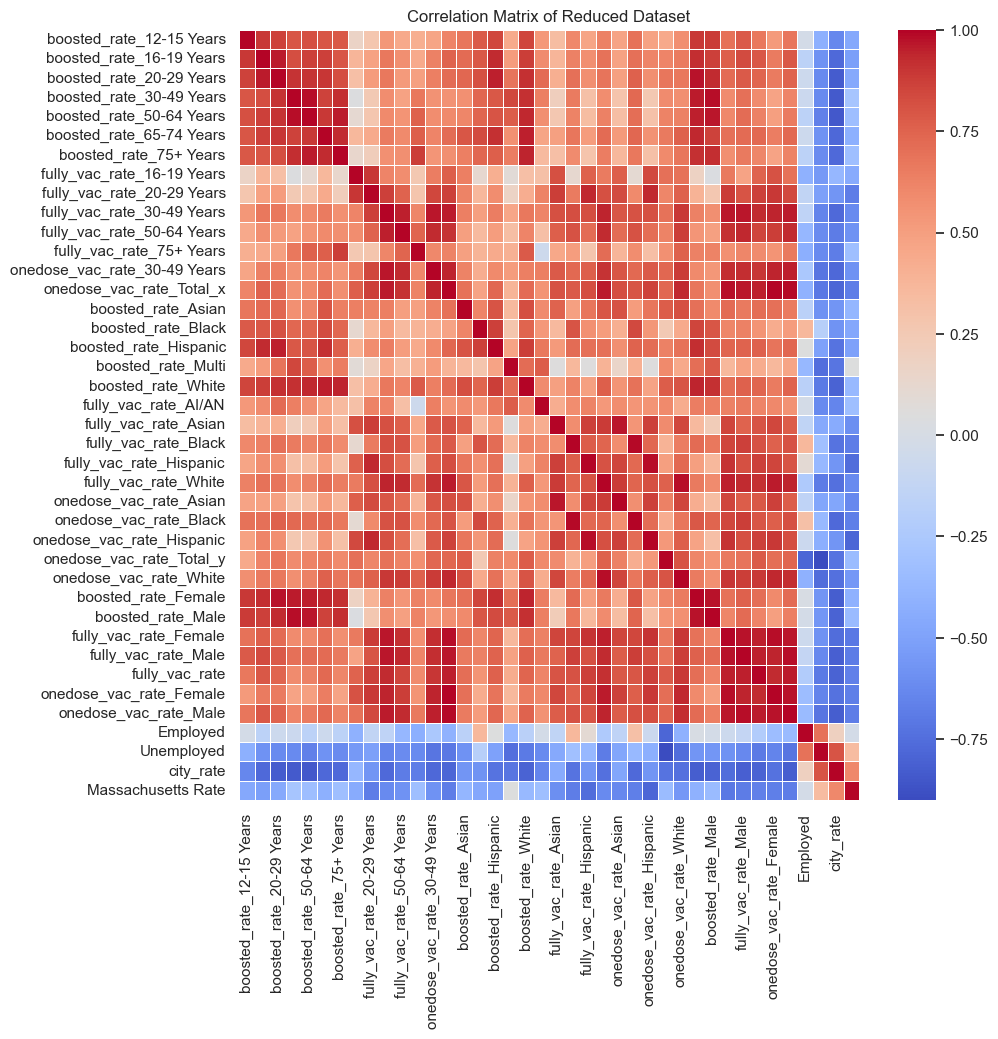

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix for the reduced dataset
reduced_correlation_matrix = df_reduced_dropped.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(reduced_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix of Reduced Dataset")
plt.show()